# Useful Python tools for improving runtime

This script illustrates the following concepts:
- Caching - how to save calculations in a variable to speed up computation
- Timing comparisons - how to use **time()** to figure out how long a computation took
- Try-except to catch parameter errors and to determine if the caching variables exist
- Associating attributes (variables) with functions - using default function attributes, like __name__

Four versions: Caching y/n and instrumented for timing y/n

Note: For the lecture activity we'll create a cached, instrumented version in a class, which is the cleaner way to do this.

## Fibonacci sequence (basic)

This function outputs the **n**th value of a Fibonacci sequence.

In [2]:
def fib_basic(n):
    """
    Simple Fibonacci function, defined recursively.
    :param n: A non-negative integer.
    :return: The Fibonacci number for n.
    """

    # Check to make sure the argument is valid.
    if n < 0:
        raise ValueError('Argument must be non-negative')

    # If n is 0 or 1, just return the Fibonacci number.  Otherwise return the sum of the previous two
    # Fibonacci numbers.
    if n < 2:
        return n
    else:
        return fib_basic(n - 1) + fib_basic(n - 2)

Functions are, themselves, dictionaries. Just like classes, the have a bunch of pre-defined variables. This is one useful one - you can ask the function for it's name. We'll see why this is useful later.

In [3]:
print(f'Function name is: {fib_basic.__name__}()')  # .__name_ is defined on every function

Function name is: fib_basic()


### Testing

This is a hard-coded set of correct answers to test against. We'll write a bit of text code using this. 

GUIDE: Try changing **fib_basic** so it is incorrect, and see if the following tests catch that.

In [4]:
fib_tests = {0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13}

In [5]:
# Since fib_tests is a dictionary, and we want both the key and the value, we use the .items() iteration method
b_tests_ok = True
for number, value in fib_tests.items():
    # Call the function and compare it to the test value - != is safe because this is an integer
    if fib_basic(number) != value:
        b_tests_ok = False
        print(f'  failed for {number}: expected {value}, got {fib_basic(number)}'.format(number, value, func(number)))
if b_tests_ok:
    print('Passed the tests!')

Passed the tests!


**try-except** is a handy version of an if-else that, unlike an if-else, will not bring your program to a crashing halt when something goes wrong. In essense, do the bit of code under the **try**, and if it doesn't generate any errors, skip the **except** part. If it does generate the error given in the **except** (leave blank to catch any error) then do the code under the **except** instead. 

In [6]:
# Make sure we catch the invalid cases.
try:
    fib_basic(-1)
    print('  failed for negative value')
except ValueError:
    # This is the error the functions should throw if given a -1 - so it
    #   passed the test, don't do anything
    print('Correctly generated a ValueError when called with -1')
    pass

Correctly generated a ValueError when called with -1


## Caching

The function **fib_basic** recalculates everything, all the time. It's not as if the value for 3 is going to change; can't we just "save" it? The answer is - yes. This is called *caching*. Caching can be implemented in a lot of ways, but one of the simplest is a dictionary. 

But... how do you keep a dictionary that persists over time? All the variables inside of **fib_basic** just... disappear when you exit the function.

Ok, so you could use a global variable or a variable in the script but... global variables are Dangerous. And we've worked so hard to get rid of them... and you don't want to create a variable name that might get re-used somewhere else.

This is a bit of a wonky Python thing, but remember that Python functions are just dictionaries. So we can create another entry in the function dictionary that keeps the "cached" data. We have to do two things to make this work:

- Use the . notation to create the variable name, just like we did with self.
- Actually create an instance of that variable (remember that functions are just read in code, not executed)

This looks like this:

In [12]:
def fib_cached(n):
    """
    Adding caching to fib_basic
    :param n: The Fibonacci number to calculate.
    :return: The Fibonacci number
    """

    # Make sure the inputs are valid - this stays the same
    if n < 0:
        raise ValueError('Argument must be non-negative')

    # Try to return the value from the cache.
    try:
        # Here we hope that the variable cache exists already, and it has the key n
        print(f'Seeing if value for {n} is in cache ...')
        return fib_cached.cache[n]
    except AttributeError:
        # If you get an Attribute error, that means the variable cache does not exist - so create it
        #.  - and fill it in with the two base case values, 0 and 1
        # Normally I wouldn't put a print statement here - this is just to show you what happens in what order
        print('Creating cache')
        fib_cached.cache = {0: 0, 1: 1}
        # Call self again, but will not end up here again
        return fib_cached(n)
    except KeyError:
        # The cache exists, but it doesn't have n in it. So calculate the nth value using recursion
        retval = fib_cached(n - 1) + fib_cached(n - 2)

        # Add it to the cache
        print(f'Setting value {n} in cache ...')
        fib_cached.cache[n] = retval

        # Return the value.
        return retval

Here's where we actually create the variable cache (and initialize it with our base cases, 0 and 1)

GUIDE: Using the print statements, see if you can figure out which try-except branch you ended up in (and how many times)

In [13]:
# Try a few values
print(f'Checking 1, returns: {fib_cached(1)}')

Seeing if value for 1 is in cache ...
Creating cache
Seeing if value for 1 is in cache ...
Checking 1 1


In [14]:
# GUIDE: Try a few values (and the same value twice) to see how it differs
print(f'Checking 3, returns: {fib_cached(3)}')

Seeing if value for 3 is in cache ...
Seeing if value for 2 is in cache ...
Seeing if value for 1 is in cache ...
Seeing if value for 0 is in cache ...
Setting value 2 in cache ...
Seeing if value for 1 is in cache ...
Setting value 3 in cache ...
Checking 1 2


## Instrumenting for number of calls

Let's use the same variable on a function trick to count how many times the function is called

In [15]:
def fib_instrumented(n):
    """
    Simple Fibonacci function, defined recursively, instrumented to count calls.
    :param n: A non-negative integer.
    :return: The Fibonacci number for n.
    """

    # Increment the call count
    #   We're going to use the same try-except to initialize this variable
    try:
        fib_instrumented.call_count += 1
    except AttributeError:
        fib_instrumented.call_count = 1

    # Check to make sure the argument is valid.
    if n < 0:
        raise ValueError('Argument must be non-negative')

    # If n is 0 or 1, just return the Fibonacci number.  Otherwise return the sum of the previous two
    # Fibonacci numbers.
    if n < 2:
        return n
    else:
        return fib_instrumented(n - 1) + fib_instrumented(n - 2)


The following line will generate an error until you actually call the function at least once - this is because the **except** code in the try except isn't actually executed when you execute the previous cell

GUIDE: Try this line, then the next, and then come back and try this one

In [20]:
print(f'Number of times fib_instrumented has been called: {fib_instrumented.call_count}')

Number of times fib_instrumented has been called: 5


In [21]:
# GUIDE Try a few values, then go back and execute the previous line again. Do this again...
print(f'Checking 3 {fib_instrumented(3)}')

Checking 1 2


## One more time - putting them both together

This just puts both of the previous versions (cache and instrumented) together in one function

In [23]:
def fib_cached_instrumented(n):
    """
    This Fibonacci function uses caching to speed things up.
    It's also instrumented, to show how many function calls are taken
    :param n:
    :return:
    """
    # Increment the call count - see fib_instrumented for explanation
    try:
        fib_cached_instrumented.call_count += 1
    except AttributeError:
        fib_cached_instrumented.call_count = 1

    # Check to make sure the argument is valid.
    if n < 0:
        raise ValueError('Argument must be non-negative')

    # Try to return a number from the cache.  If that fails, then we have to calculate it (recursively) from scratch,
    # add it to the cache, and then return it.
    try:
        return fib_cached_instrumented.cache[n]  # Again, this is a variable defined on the function
    except AttributeError:
        fib_cached_instrumented.cache = {0: 0, 1: 1}
        # Call self again, but will not end up here again
        return fib_cached_instrumented(n)
    except KeyError:
        # Calculate the value recursively
        retval = fib_cached_instrumented(n - 1) + fib_cached_instrumented(n - 2)

        # Store it in the cache
        fib_cached_instrumented.cache[n] = retval

        # And, finally, return it
        return retval

In [30]:
# GUIDE Try a few values, then execute the next line. Then repeat...
print(f'Checking 3 {fib_cached_instrumented(3)}')

Checking 3 2


In [31]:
print(f'Number of times fib_cached_instrumented has been called: {fib_cached_instrumented.call_count}')

Number of times fib_cached_instrumented has been called: 7


# Cool trick - treating functions as objects

In Python functions are just... more objects. So the following works

In [32]:
#   This is an array of the functions we're going to test
#     Notice we're not calling the functions (no ()) - we're just putting the
#     function variables in the list
functions = [fib_basic, fib_cached, fib_instrumented, fib_cached_instrumented]

# Test each of the functions on all of the test cases.
for func in functions:  # Yes, this works - func is one of the fib_* functions
    print('{0}():'.format(func.__name__))  # .__name__ is defined on every function

    # Since fib_tests is a dictionary, and we want both the key and
    #  the value, we use the .items() iteration method
    for number, value in fib_tests.items():
        # Call the function and compare it to the test value
        if func(number) != value:
            print('  failed for {0}: expected {1}, got {2}'.format(number, value, func(number)))

    # Make sure we catch the invalid cases.
    try:
        func(-1)
        print('  failed for negative value')
    except ValueError:
        # This is the error the functions should throw if given a -1 - so it
        #   passed the test, don't do anything
        pass

    print('  tests complete')

fib_basic():
  tests complete
fib_cached():
Seeing if value for 0 is in cache ...
Seeing if value for 1 is in cache ...
Seeing if value for 2 is in cache ...
Seeing if value for 3 is in cache ...
Seeing if value for 4 is in cache ...
Seeing if value for 3 is in cache ...
Seeing if value for 2 is in cache ...
Setting value 4 in cache ...
Seeing if value for 5 is in cache ...
Seeing if value for 4 is in cache ...
Seeing if value for 3 is in cache ...
Setting value 5 in cache ...
Seeing if value for 6 is in cache ...
Seeing if value for 5 is in cache ...
Seeing if value for 4 is in cache ...
Setting value 6 in cache ...
Seeing if value for 7 is in cache ...
Seeing if value for 6 is in cache ...
Seeing if value for 5 is in cache ...
Setting value 7 in cache ...
  tests complete
fib_instrumented():
  tests complete
fib_cached_instrumented():
  tests complete


# Runtime

So why do we wan't caching? This is a quick example of why. But first we'll do something we've done before - pass a function into a function. In this function we're going to add a bit of code before and after calling the function. What this code does:

- Sets the call_count to be 0 - notice that this works for *any* function because it will create the **call_count** variable on the function
- Check the wall clock time before and after calling the function

In [33]:
def time_fib(f, n):
    """
    A wrapper function to time the execution of a Fibonacci function.
    :param f: The function to time.
    :param n: The Fibonacci number to evaluate.
    :return: The Fibonacci number.
    """
    # You can put the import here - it will only happen if time_fib is called
    from time import time

    # Reset the call count
    #   For the functions that *don't* have instrumentation, this will
    #    create that variable
    f.call_count = 0

    # Time a call to the Fibonacci function
    start_time = time()
    f(n)
    stop_time = time()

    # Return the time and the call count.
    return stop_time - start_time, f.call_count

In [34]:
# Do some timing tests to see how long things take.  We're going to look at wall clock time and also
# at the number of calls we make to the fib() function.  To do that, we're going to make a new version
# of the function that's instrumented to count the number of calls, which we will call fib2().
N = 15   # test on 1 to 15
times, counts = zip(*(time_fib(fib_instrumented, n) for n in range(N)))
cached_times, cached_counts = zip(*(time_fib(fib_cached_instrumented, n) for n in range(N)))

## Plot!!

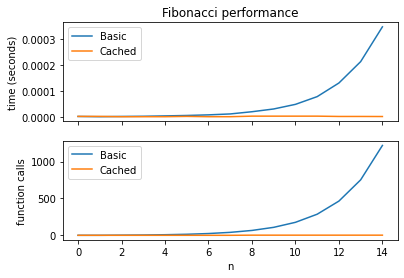

In [35]:
# You can put the imports here
import matplotlib.pyplot as plt

# Let's plot the times and the call counts
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.set_title('Fibonacci performance')

# Plot the times
time_plot, = ax1.plot(times)
cached_time_plot, = ax1.plot(cached_times)
ax1.set_ylabel('time (seconds)')
ax1.legend([time_plot, cached_time_plot], ['Basic', 'Cached'])

# Plot the call counts
call_plot, = ax2.plot(counts)
cached_call_plot, = ax2.plot(cached_counts)
ax2.set_xlabel('n')
ax2.set_ylabel('function calls')
ax2.legend([call_plot, cached_call_plot], ['Basic', 'Cached'])

# Display the graphs.
plt.show()

What to take away from this...

- Computation time is a function of how many calls you make.
- Computation time does not increase *linearly* with the number **n**, but in a nasty upward looking curve (this is actually an exponential)
- Caching can be a big win if you're doing the same thing over and over again
